# MIT-BIH database download and visualization

## Download the database
I list all the possible data urls and use _requests.get_ to download them.  
_(Are there any easier method? This looks a little cumbersome.)_

In [ ]:
import os

wfdb.dl_database('mitdb', os.path.join(os.getcwd(), 'mitdb'))

## Visualize the database
Using WFDB package. https://github.com/MIT-LCP/wfdb-python

In [1]:
import wfdb
from IPython.display import display

#### Below is a normal record

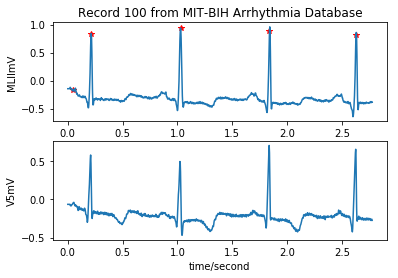

In [226]:
records = wfdb.get_record_list('mitdb')

# some parameters
file_name = '100'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

record = wfdb.rdrecord('data/' + file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 
annotation = wfdb.rdann('data/' + file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

#### Below is a abnormal record

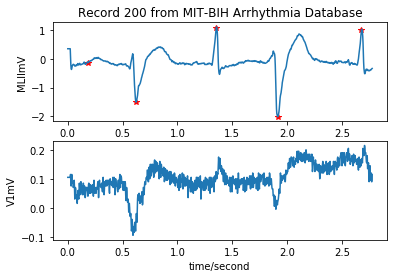

In [227]:
# some parameters
file_name = '200'
sampfrom, sampto = 0, 1000 # sample range
channels = [0, 1]

record = wfdb.rdrecord('data/' + file_name, sampfrom = sampfrom, sampto = sampto, channels = channels) 
annotation = wfdb.rdann('data/' + file_name, 'atr', sampfrom = sampfrom, sampto = sampto)

# Plot the record along with the annotations
wfdb.plot_wfdb(record = record, annotation = annotation,
               title = 'Record ' + file_name + ' from MIT-BIH Arrhythmia Database',
               time_units = 'seconds')

## Some statistics on the data

In [201]:
import numpy as np
import pandas as pd

In [106]:
records = wfdb.get_record_list('mitdb')

Let's looks at what are the signals names for all the subjects.

In [216]:
sig_names = pd.DataFrame()

for record in records:
    signal, field = wfdb.rdsamp(record)
    sig_names[record] = pd.Series(field['sig_name'], index = ['Channel 1', 'Channel 2'])
    
pd.options.display.max_columns = 999   
sig_names

,100,101,102,103,104,105,106,107,108,109,111,112,113,114,115,116,117,118,119,121,122,123,124,200,201,202,203,205,207,208,209,210,212,213,214,215,217,219,220,221,222,223,228,230,231,232,233,234
Channel 1,MLII,MLII,V5,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,V5,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII,MLII
Channel 2,V5,V1,V2,V2,V2,V1,V1,V1,V1,V1,V1,V1,V1,MLII,V1,V1,V2,V1,V1,V1,V1,V5,V4,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1,V1


In [209]:
sig_names.T.apply(pd.value_counts)

,Channel 1,Channel 2
MLII,45.0,1
V1,NaN,40
V2,NaN,4
V4,NaN,1
V5,3.0,2


Result: most of them are 'MLII' or 'V1', only a few are 'V2' - 'V5'

Then let's look at the annotation symbols for all the subjects.

In [217]:
ann_symbols = pd.DataFrame()

for record in records:
    ann = wfdb.rdann(record, 'atr')
    ann_symbols[record] = pd.Series(ann.symbol)

Beat counts by subject and beat type

In [218]:
ann_counts = ann_symbols.apply(pd.value_counts)

Total counts of different type of beats among all subjects

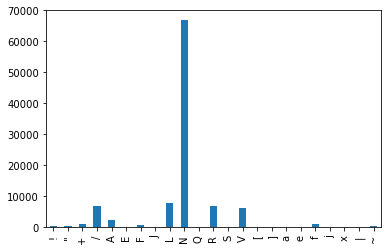

In [213]:
ann_counts.sum(axis=1).plot(kind = 'bar')